## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

Github Repo Link:
https://github.com/ava-lei/Real-vs.-Fraudulent-Job-Posting-Model-in-ML

Medium Post Link:
https://avalei.medium.com/job-posting-model-building-revising-and-evaluating-in-machine-learning-c0e85b5ebfce

In [83]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [6]:
#read csv files
data = pd.read_csv("https://drive.google.com/uc?export=download&id=1vDp9nlkLf7DaJCcan-Y0MtT7bHWvPc1F") #import job data from the csv file
frame = pd.DataFrame(data) #change it into dataframe
frame.head() # check the first 5 rows

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
frame.shape #understand the shape of the dataframe

(17880, 18)

In [8]:
frame.info() #check for null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [9]:
# select needed feautures
del frame['job_id']
del frame['description']
del frame['department']
del frame['company_profile']
del frame['benefits']

In [10]:
# drop duplicates
frame.drop_duplicates(inplace=True)

In [11]:
#drop null values
frame.dropna(axis= 0, how= 'any', inplace=True)

In [12]:
frame.head() # check the first 5 rows

,title,location,salary_range,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,Head of Content (m/f),"DE, BE, Berlin",20000-28000,Your Know-How: ...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
10,ASP.net Developer Job opportunity at United St...,"US, NJ, Jersey City",100000-120000,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
15,VP of Sales - Vault Dragon,"SG, 01, Singapore",120000-150000,Key Superpowers3-5 years of high-pressure sale...,0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
23,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",100000-120000,"Job Requirements:A reputation as a ""go-getter""...",0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
31,Software Applications Specialist,"US, KS,",50000-65000,Must Have's3+ years of experience with web-bas...,0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0


In [13]:
frame.shape #get the shape of the revised dataframe

(1917, 13)

In [14]:
frame.info() # display the information of the revised dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1917 entries, 6 to 17867
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                1917 non-null   object
 1   location             1917 non-null   object
 2   salary_range         1917 non-null   object
 3   requirements         1917 non-null   object
 4   telecommuting        1917 non-null   int64 
 5   has_company_logo     1917 non-null   int64 
 6   has_questions        1917 non-null   int64 
 7   employment_type      1917 non-null   object
 8   required_experience  1917 non-null   object
 9   required_education   1917 non-null   object
 10  industry             1917 non-null   object
 11  function             1917 non-null   object
 12  fraudulent           1917 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 209.7+ KB


For the 13 columns, the fraudulent is the target variable, while the rest are feature variables.

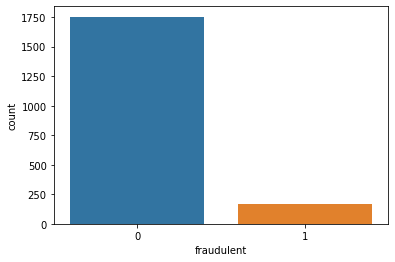

In [15]:
# display the distribution of the target variable
sns.countplot(x=frame['fraudulent'])
plt.show()

'0' for not fraudulent job posting and '1' for fraudulent job posting. 
We can observe that the target variable is unbalanced, so when partitioning data, stratify and random state argument are needed.

In [16]:
# separate target variable from features
X = frame.iloc[:, :-1]
X = pd.get_dummies(X)
y = frame.iloc[:, -1]

# partition data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
# baseline classification
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
acc_bas = dummy_classifier.score(X_test,y_test)
print("Baseline accuracy is", acc_bas)

Baseline accuracy is 0.9140625


In [16]:
# logistic regression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_y_pred = lgr.predict(X_test)
df_lgr = pd.DataFrame({'y_test': y_test, 'y_pred': lgr_y_pred}) 
print(df_lgr)
acc_lgr = accuracy_score(y_test, lgr_y_pred)
print("Logistic regression accurarcy is", acc_lgr)

       y_test  y_pred
1512        0       0
12887       0       0
14880       0       0
7626        0       0
238         0       0
...       ...     ...
11914       0       0
3979        0       0
5333        0       0
3336        0       0
4032        0       0

[384 rows x 2 columns]
Logistic regression accurarcy is 0.953125


In [17]:
# bagging ensemble with base estimator as DecisionTreeClassifier of max depth = 5, n_estimators = 100, random_state = 42
base_est = DecisionTreeClassifier (max_depth = 5)
bag = BaggingClassifier(base_est, n_estimators=100, random_state = 42)
bag.fit(X_train, y_train)
bag_y_pred = bag.predict(X_test)
df_bag = pd.DataFrame({ 'y_test': y_test, 'y_pred': bag_y_pred}) 
print(df_bag)
acc_bag = accuracy_score( y_test, bag_y_pred)
print('Bagging accuracy is', acc_bag)

       y_test  y_pred
1512        0       0
12887       0       0
14880       0       0
7626        0       0
238         0       0
...       ...     ...
11914       0       0
3979        0       0
5333        0       0
3336        0       0
4032        0       0

[384 rows x 2 columns]
Bagging accuracy is 0.9427083333333334


In [18]:
# random forest model with n_estimators = 100, max_features=7, random_state = 42
rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
df_rf = pd.DataFrame({ 'y_test': y_test, 'y_pred': rf_y_pred}) 
print(df_rf)
acc_rf = accuracy_score(y_test, rf_y_pred)
print('Random forest accuracy is', acc_rf)

       y_test  y_pred
1512        0       0
12887       0       0
14880       0       0
7626        0       0
238         0       0
...       ...     ...
11914       0       0
3979        0       0
5333        0       0
3336        0       0
4032        0       0

[384 rows x 2 columns]
Random forest accuracy is 0.9713541666666666


In [19]:
# ada boost model with base estimator as DecisionTreeClassifier of max depth = 4, n_estimators = 100, random_state = 42, learning_rate = 0.2
ada = AdaBoostClassifier(base_est, n_estimators=100, random_state=42, learning_rate=0.2)
ada.fit(X_train, y_train)
ada_y_pred = ada.predict(X_test)
df_ada = pd.DataFrame({ 'y_test': y_test, 'y_pred': ada_y_pred}) 
print(df_ada)
acc_ada = accuracy_score(y_test, ada_y_pred)
print('AdaBoost accuracy is', acc_ada)

       y_test  y_pred
1512        0       0
12887       0       0
14880       0       0
7626        0       0
238         0       0
...       ...     ...
11914       0       0
3979        0       0
5333        0       0
3336        0       0
4032        0       0

[384 rows x 2 columns]
AdaBoost accuracy is 0.9739583333333334


In [20]:
# gradient boosted trees model with n_estimators = 100, random_state = 42, learning_rate = 0.2
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42, learning_rate=0.2)
gbc.fit(X_train, y_train)
gbc_y_pred = gbc.predict(X_test)
df_gbc = pd.DataFrame({ 'y_test': y_test, 'y_pred': gbc_y_pred}) 
print(df_gbc)
acc_gbc = accuracy_score(y_test, gbc_y_pred)
print('Gradient boosted trees accuracy is', acc_gbc)

       y_test  y_pred
1512        0       0
12887       0       0
14880       0       0
7626        0       0
238         0       0
...       ...     ...
11914       0       0
3979        0       0
5333        0       0
3336        0       0
4032        0       0

[384 rows x 2 columns]
Gradient boosted trees accuracy is 0.9713541666666666


In [21]:
# voting classifier with an ensemble of DecisionTreeClassifier, Support Vector Machine and Logistic Regression
dt= DecisionTreeClassifier(max_depth=5)
svm = SVC(probability=True)
vot = VotingClassifier(estimators = [('dt',dt), ('svm',svm), ('lgr',lgr)], voting ='soft') 
vot.fit(X_train, y_train)
vot_y_pred = vot.predict(X_test)
df_vot = pd.DataFrame({ 'y_test': y_test, 'y_pred': vot_y_pred}) 
print(df_vot)
acc_vot = accuracy_score(y_test, vot_y_pred)
print('Voting accuracy is', acc_vot)

       y_test  y_pred
1512        0       0
12887       0       0
14880       0       0
7626        0       0
238         0       0
...       ...     ...
11914       0       0
3979        0       0
5333        0       0
3336        0       0
4032        0       0

[384 rows x 2 columns]
Voting accuracy is 0.9713541666666666


In [22]:
# k nearest neighbors model with n_neighbors=1
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train, y_train)
kn_y_pred = kn.predict(X_test)
df_kn = pd.DataFrame({ 'y_test': y_test, 'y_pred': kn_y_pred}) 
print(df_kn)
acc_kn = accuracy_score(y_test, kn_y_pred)
print('K nearest neighbors accuracy is', acc_kn)

       y_test  y_pred
1512        0       0
12887       0       0
14880       0       0
7626        0       0
238         0       0
...       ...     ...
11914       0       0
3979        0       0
5333        0       0
3336        0       0
4032        0       0

[384 rows x 2 columns]
K nearest neighbors accuracy is 0.9739583333333334


In [18]:
# extreme gradient boost model with n_estimators=100, max_depth=5, learning_rate=0.2
xg = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.2)
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
xg_X_train = X_train[:]
xg_X_test = X_test[:]
xg_X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<', ' '))) else col for col in X_train.columns.values]
xg.fit(xg_X_train, y_train)
xg_X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
xg_y_pred = xg.predict(xg_X_test)
df_xg = pd.DataFrame({ 'y_test': y_test, 'y_pred': xg_y_pred}) 
print(df_xg)
acc_xg = accuracy_score(y_test, xg_y_pred)
print('XGBoost accuracy is ', acc_xg)

       y_test  y_pred
1512        0       0
12887       0       0
14880       0       0
7626        0       0
238         0       0
...       ...     ...
11914       0       0
3979        0       0
5333        0       0
3336        0       0
4032        0       0

[384 rows x 2 columns]
XGBoost accuracy is  0.9765625


In [24]:
# constructs a dataframe to display the models along with their corresponding accuracies
models = ['baseline','logistic regression','bagging', 'random forest','ada boost','gradient boosted trees','voting','k nearest neighbors','xg boost']
accuracies = [acc_bas,acc_lgr,acc_bag,acc_rf,acc_ada,acc_gbc,acc_vot,acc_kn,acc_xg]
df = pd.DataFrame({'model': models, 'accuracy': accuracies})
print(df)

                    model  accuracy
0                baseline  0.914062
1     logistic regression  0.953125
2                 bagging  0.942708
3           random forest  0.971354
4               ada boost  0.973958
5  gradient boosted trees  0.971354
6                  voting  0.971354
7     k nearest neighbors  0.973958
8                xg boost  0.976562


Extreme gradient boosting (XGBoost) is chosen as the model to be further explored on, as it has the highest accuracy and contains many hyperparameters to be tuned and choices for regularization to perform a more accurate while not-under-/over-fitting model.


In [19]:
# prepare for tuning; has to do some modifications to the feature names to make XGBoost model work
xg_X = X[:]
xg_X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
dmatrix = xgb.DMatrix(data=xg_X,label=y) # prepare the dmatrix

In [20]:
# see what cross-validation score with the current parameters
params = {'n_estimators':100, 'max_depth': 5,'learning_rate': 0.2}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True)

In [18]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.416904,0.001886,0.419846,0.000647
1,0.353097,0.003107,0.358957,0.001603
2,0.305280,0.004169,0.315002,0.002565
3,0.269241,0.004213,0.282131,0.005550
4,0.241342,0.003792,0.257073,0.006872


In [19]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.188636
Name: test-rmse-mean, dtype: float64


The reason why cross validation is needed for tuning hyperparameters (instead of just looking at the accuracy) is that the model that fits this set might not be able to apply to other estimators.

When trying approaches to tune hyperparameters, I find that both for loops of cross validation and grid/randomized search take an extremely long time (above an hour). So, I use cross validation by manually inputting hyperparameters to try out the best fit. The code is shown as below.

I find the following is the best combination (least rmse) within a certain range. Though subsample reduces the model's rmse, it is still needed for pruning to reduce the chances of over-fitting.

In [20]:
params_2 = {'n_estimators':100, 'max_depth': 7,'learning_rate': 0.25, 'subsample':0.9}
cv_results_2 = xgb.cv(dtrain=dmatrix, params=params_2, nfold=3, num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True)
print((cv_results_2["test-rmse-mean"]).tail(1))

49    0.185267
Name: test-rmse-mean, dtype: float64


Now, we discover the optimal hyperparameters for XGBClassifier to generate a reliable model. After implementing these parameters, we can alter other ones to avoid overfitting. We've already included learning_rate, aka eta, in regularization (multiplying the tree values by a number less than one to make the model fit slower and prevent overfitting) and subsample in sampling (subsample rows of the training data prior to fitting a new estimator). 

We can do more of these to avoid overfitting. Next, I would perform the search (with some predetermined hyperparameters) to find the optimal min_split_loss, aka gamma, in pruning (fixed threshold of gain improvement to keep a split), L2 regularization, aka lambda, and L1 regularization, aka alpha (shift which splits are taken and shrink the weights). XGBoost itself has these parameters to regulate the model.. 

The next try sets the alpha to 1.1, which is higher than default. An increase in alpha (L1 regularization) means a more conservative model. With all other hyperparameters being set, now we're going to figure the optimal gamma (min_split_loss) as a way of pruning to further avoid over-fitting.

In [ ]:
# find the best gamma (might take ~40-50 minutes to execute the code)
model = XGBClassifier(n_estimators=100, max_depth=7,learning_rate=0.25, subsample=0.9, alpha=1.1)
gammas = {'gamma': np.arange(0,5,0.1)}
search = GridSearchCV(model,gammas,scoring="accuracy",cv=3,n_jobs=6)
result = search.fit(xg_X_train, y_train)
print("The best gamma is", result.best_params_)

Now we have the optimal gamma as 3.2

Then, we can revise the hyperparameters of the model to optimize it

In [21]:
# the model with new hyperparameters and regularizations (might take ~2 mins to execute the code)
xg_new = XGBClassifier(n_estimators=100, max_depth=7,learning_rate=0.25, subsample=0.9, gamma=3.2, alpha=1.1)
xg_new.fit(xg_X_train, y_train)
xg_new_y_pred = xg_new.predict(xg_X_test)
# print the report (accuracy is included)
print('Classification Report:\n')
print(classification_report(y_test, xg_new_y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       351
           1       0.93      0.79      0.85        33

    accuracy                           0.98       384
   macro avg       0.95      0.89      0.92       384
weighted avg       0.98      0.98      0.98       384



Confusion Matrix for Testing Data (0 for not fraudulent job posting and 1 for fraudulent job posting)


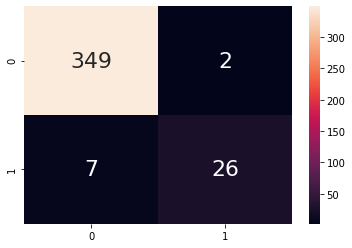

In [54]:
# confusion matrix for test data set
print('Confusion Matrix for Testing Data (0 for not fraudulent job posting and 1 for fraudulent job posting)')
sns.heatmap(confusion_matrix(y_test, xg_new_y_pred), annot = True, fmt=".0f", annot_kws={"size": 22})

Let's do another validation. Due to the imbalance in instances for each class (recall the count plot--far more 'not fraudulent' than 'fraudulent,' this time, I'm going to conduct a stratified cross validation to evaluate the optimized XGBoost model.

In [25]:
# stratified-kfold cross validation
kfold = StratifiedKFold(n_splits=10)
results = cross_val_score(xg_new, xg_X_train, y_train, cv=kfold)
print("stratified cross validation score: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

stratified cross validation score: 95.50% (0.84%)


In [82]:
# create feature importance *but we used dummy variables to build the model*
# take a few more steps to generate the dataframe
imp = xg_new.feature_importances_
feature_xg= X_train.columns
imp_df =pd.DataFrame({'features':feature_xg, 'importance':imp})
title = 0
location = 0
salary_range = 0
requirements = 0
telecommuting = 0
has_company_logo = 0
has_questions = 0
employment_type = 0
required_experience = 0
required_education = 0
industry = 0
function = 0

for c in imp_df['features']:
  if 'title' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
    title += impo
  if 'location' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
    location += impo
  if 'salary' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
    salary_range += impo
  if 'requirements' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
    requirements += impo
  if 'telecommuting' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
    telecommuting += impo
  if 'logo' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
  if 'questions' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
    has_questions += impo
  if 'employment' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
    employment_type += impo  
  if 'experience' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
    required_experience += impo  
  if 'education' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
    required_education += impo
  if 'industry' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
    industry += impo
  if 'function' in c:
    impo = imp_df[imp_df.features==c]['importance'].sum()
    function += impo

cate_df = pd.DataFrame({'categorical features': frame.iloc[:, :-1].columns, 'importances': [title, location, salary_range, requirements, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function]})
cate_df_sorted=cate_df.sort_values(by='importances',ascending=False)

print(cate_df_sorted)

   categorical features  importances
10             industry     0.199124
9    required_education     0.143080
11             function     0.142775
1              location     0.105084
0                 title     0.100986
2          salary_range     0.088619
8   required_experience     0.071512
7       employment_type     0.055425
3          requirements     0.041477
6         has_questions     0.016353
4         telecommuting     0.000000
5      has_company_logo     0.000000


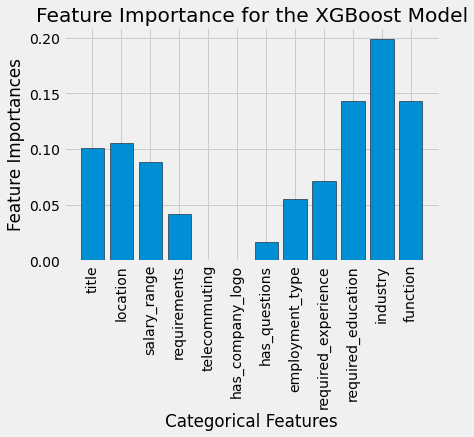

In [102]:
cate_fea = frame.iloc[:, :-1].columns
importances = [title, location, salary_range, requirements, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function]
plt.style.use('fivethirtyeight')
plt.bar(cate_fea, importances, color='#008fd5', edgecolor='black')
plt.tick_params('x', labelrotation = 90)
plt.xlabel('Categorical Features')
plt.ylabel('Feature Importances')
plt.title('Feature Importance for the XGBoost Model')
plt.show()

We noticed that industry matters the most for identifying whether a job posting is fradulent or not. Let's explore more on this.

In [147]:
ind = frame['industry']
indGroup = frame.groupby(by='industry').agg('count')
industry_count =indGroup[[indGroup.columns[0]]]
industry_fradulent = frame[frame['fraudulent']== 1]
ind_f_Group = industry_fradulent.groupby(by='industry').agg('count')
industry_f_count =ind_f_Group[[ind_f_Group.columns[0]]]
df_ind = pd.concat([industry_count, industry_f_count], axis=1)
df_ind.columns = ['total_postings', 'fraudulent_postings']
df_ind['fraudulent_postings'] = df_ind['fraudulent_postings'].replace(np.nan, 0)
df_ind['fraudulent_percentage'] = df_ind.fraudulent_postings/df_ind.total_postings
print(df_ind)

                      total_postings  ...  fraudulent_percentage
Accounting                        32  ...                 0.5625
Airlines/Aviation                  2  ...                 0.0000
Apparel & Fashion                  9  ...                 0.0000
Automotive                        46  ...                 0.0000
Aviation & Aerospace               2  ...                 0.0000
...                              ...  ...                    ...
Warehousing                        4  ...                 0.2500
Wholesale                          1  ...                 0.0000
Wine and Spirits                   1  ...                 0.0000
Wireless                           1  ...                 0.0000
Writing and Editing                3  ...                 0.0000

[111 rows x 3 columns]


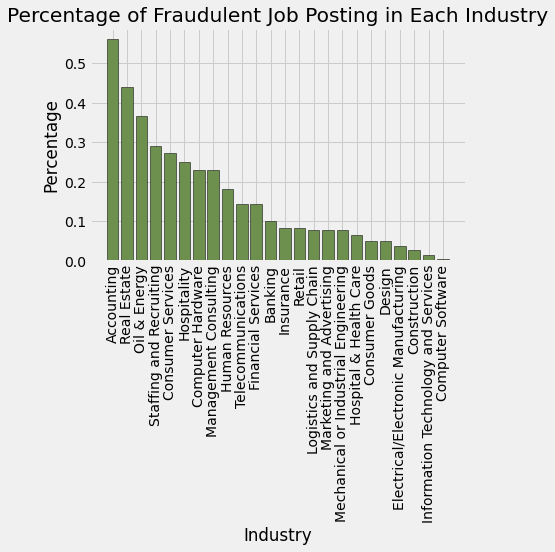

In [149]:
# ensure the total posting is at least 10 (having just 1 total posting in an industry and is fake generates a 100% fraudulent percentage)
df_ind = df_ind[df_ind['total_postings']>9].sort_values(by=['fraudulent_percentage'],ascending=False)[0:24]
indus = df_ind.index
f_percentage = df_ind['fraudulent_percentage']
plt.style.use('fivethirtyeight')
plt.bar(indus, f_percentage, color='#6d904f', edgecolor='black')
plt.tick_params('x', labelrotation = 90)
plt.xlabel('Industry')
plt.ylabel('Percentage' )
plt.title('Percentage of Fraudulent Job Posting in Each Industry')
plt.show()